<a href="https://colab.research.google.com/github/lsharples1/Data_Science_Competition/blob/main/DataScienceComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from imblearn.over_sampling import SMOTE

url1 = 'https://raw.githubusercontent.com/lsharples1/Data_Science_Competition/main/Simulated_Data_Train.csv?token=AO4LMYK744PF4GAEXCQHBZDAPSKSM'
train = pd.read_csv(url1)

url2 = 'https://raw.githubusercontent.com/lsharples1/Data_Science_Competition/main/Simulated_Data_Test.csv'
test = pd.read_csv(url2)

url3 = 'https://raw.githubusercontent.com/lsharples1/Data_Science_Competition/main/Simulated_Data_Validation.csv?token=AO4LMYMGZVCQVZJ6P6TBBS3APSKXS'
validate = pd.read_csv(url3)


#x dataframes have all columns of attributes
#y dataframes have just the indicator (0 or 1)

y_Train = train['Default_ind']
x_Train = train
x_Train.drop('Default_ind', axis='columns',inplace=True)

x_Train = pd.get_dummies(x_Train, prefix_sep='_', drop_first=False)

#x_Train.drop('auto_open_ 36_month_num', axis='columns',inplace=True)
#x_Train.drop('ind_acc_XYZ', axis='columns',inplace=True)
#print(x_Train)

#x_Train.drop('card_age', axis='columns',inplace=True)
#x_Train = train.loc[:, train.columns != 'Default_ind']
#x_Train = train.loc[:, train.columns != 'uti_card']


#state_train = le.fit_transform(x_Train.States)
#x_Train['States'] = state_train
#x_Train.drop('States', axis='columns',inplace=True)
#print(x_Train.isnull().sum())
x_Train['uti_card_50plus_pct'].fillna((x_Train['uti_card_50plus_pct'].mean()), inplace=True) 
x_Train['rep_income'].fillna((x_Train['rep_income'].mean()), inplace=True) 
#print(y_Train.value_counts())

#scale
scaler = preprocessing.StandardScaler().fit(x_Train)
x_TrainScale = scaler.transform(x_Train)
#overfit with SMOTE
smote = SMOTE()
x_TrainOV, y_TrainOV = smote.fit_resample(x_Train, y_Train)


y_Test = test['Default_ind']
x_Test = test
x_Test.drop('Default_ind', axis='columns',inplace=True)

#x_Test.drop('auto_open_ 36_month_num', axis='columns',inplace=True)
#x_Test.drop('ind_acc_XYZ', axis='columns',inplace=True)
#x_Test.drop('card_age', axis='columns',inplace=True)
#state_test = le.fit_transform(x_Test.States)
#x_Test['States'] = state_test
x_Test = pd.get_dummies(x_Test, prefix_sep='_', drop_first=False)
#x_Test.drop('States', axis='columns',inplace=True)
#print(x_Test.isnull().sum())
x_Test['uti_card_50plus_pct'].fillna((x_Test['uti_card_50plus_pct'].mean()), inplace=True) 
x_Test['rep_income'].fillna((x_Test['rep_income'].mean()), inplace=True) 
#scale

scaler2 = preprocessing.StandardScaler().fit(x_Test)
x_TestScale = scaler2.transform(x_Test)



#print(y_Test.value_counts())

y_Val = validate['Default_ind']
x_Val = validate
x_Val.drop('Default_ind', axis='columns',inplace=True)
#x_Val.drop('auto_open_ 36_month_num', axis='columns',inplace=True)
#x_Val.drop('ind_acc_XYZ', axis='columns',inplace=True)
x_Val = pd.get_dummies(x_Val, prefix_sep='_', drop_first=False)
#x_Val.drop('card_age', axis='columns',inplace=True)
x_Val['uti_card_50plus_pct'].fillna((x_Val['uti_card_50plus_pct'].mean()), inplace=True) 
x_Val['rep_income'].fillna((x_Val['rep_income'].mean()), inplace=True) 
#scale

scaler3 = preprocessing.StandardScaler().fit(x_Val)
x_ValScale = scaler3.transform(x_Val)



#print(y_Val.value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train.head()

,tot_credit_debt,avg_card_debt,credit_age,credit_good_age,card_age,non_mtg_acc_past_due_12_months_num,non_mtg_acc_past_due_6_months_num,mortgages_past_due_6_months_num,credit_past_due_amount,inq_12_month_num,card_inq_24_month_num,card_open_36_month_num,auto_open_ 36_month_num,uti_card,uti_50plus_pct,uti_max_credit_line,uti_card_50plus_pct,ind_acc_XYZ,rep_income,States,Default_ind
0,80826.71,15872.99,300.0,114.0,292.0,0.0,0.0,0.0,0.00,3.0,4.0,0.0,0.0,0.365902,0.475594,0.410504,NaN,0.0,69000.0,AL,0.0
1,96052.60,12178.02,281.0,102.0,232.0,0.0,0.0,0.0,0.00,2.0,4.0,1.0,0.0,0.542786,0.543158,0.535147,0.587351,0.0,61000.0,FL,0.0
2,75212.76,12052.24,261.0,149.0,260.0,0.0,0.0,0.0,0.00,1.0,3.0,0.0,1.0,0.323678,0.321776,0.348713,0.413293,0.0,NaN,AL,0.0
3,70727.84,8416.80,227.0,93.0,223.0,2.0,1.0,1.0,11013.96,0.0,1.0,1.0,0.0,0.448721,0.422809,0.491365,0.466810,0.0,79000.0,SC,1.0
4,41604.47,10611.97,249.0,136.0,241.0,0.0,0.0,0.0,0.00,0.0,2.0,0.0,0.0,0.644030,0.619987,0.546655,0.588442,1.0,NaN,LA,0.0


In [ ]:
#EXPLOTORY DATA ANALYSIS 
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
   
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()

In [ ]:
c_palette = ['tab:blue', 'tab:orange']
quantitative_summarized(dataframe= train, y = 'credit_age', x = 'Default_ind', palette=c_palette, verbose=False, swarm=True)


count    20000.000000
mean       296.697000
std         61.711702
min         54.000000
25%        255.000000
50%        297.000000
75%        339.000000
max        545.000000
Name: credit_age, dtype: float64
mode:  0    303.0
1    307.0
dtype: float64


ValueError: ignored

In [ ]:
#MODEL 1- LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
logReg = LogisticRegression()
logReg.fit(x_TrainScale, y_Train)
predictedVAL = logReg.predict(x_ValScale)
predictedTEST = logReg.predict(x_TestScale)
accuracyLRVAL = metrics.accuracy_score(y_Val, predictedVAL)
accuracyLRTEST = metrics.accuracy_score(y_Test, predictedTEST)
print(classification_report(y_Test, logReg.predict(x_TestScale)))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      4599
         1.0       0.77      0.28      0.41       401

    accuracy                           0.94      5000
   macro avg       0.85      0.64      0.69      5000
weighted avg       0.93      0.94      0.92      5000



In [ ]:
#MODEL 2- RANDOM FOREST
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 64)
# Train the model on training data
rf = RandomForestClassifier(n_estimators = 64)
rf.fit(x_Train,y_Train)
predictedRFVAL = rf.predict(x_Val)
predictedRFTEST = rf.predict(x_Test)
accuracyRFVAL = metrics.accuracy_score(y_Val, predictedRFVAL)
accuracyRFTEST = metrics.accuracy_score(y_Test, predictedRFTEST)
print(classification_report(y_Val, rf.predict(x_Val)))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2778
         1.0       0.82      0.28      0.42       222

    accuracy                           0.94      3000
   macro avg       0.88      0.64      0.70      3000
weighted avg       0.94      0.94      0.93      3000



In [ ]:
#FEATURE IMPORTANCE FOR RANDOM FOREST
# Extract feature importances
importanceRF = pd.DataFrame({'feature': list(x_Train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
print(importanceRF)

                               feature  importance
1                        avg_card_debt    0.128093
13                            uti_card    0.076966
0                      tot_credit_debt    0.073569
8               credit_past_due_amount    0.061547
16                 uti_card_50plus_pct    0.061274
15                 uti_max_credit_line    0.060080
14                      uti_50plus_pct    0.058403
5   non_mtg_acc_past_due_12_months_num    0.055809
4                             card_age    0.055052
2                           credit_age    0.054521
3                      credit_good_age    0.052545
18                          rep_income    0.052236
7      mortgages_past_due_6_months_num    0.038030
6    non_mtg_acc_past_due_6_months_num    0.037369
10               card_inq_24_month_num    0.034881
9                     inq_12_month_num    0.033735
11              card_open_36_month_num    0.008501
17                         ind_acc_XYZ    0.007771
20                           St

In [ ]:
#FEATURE IMPORTANCE FOR LOGISTIC REGRESSION
importanceLR = pd.DataFrame({'feature': list(x_Train.columns),
                   'importance': logReg.coef_[0]}).\
                    sort_values('importance', ascending = False)

# Display
print(importanceLR)


                               feature  importance
12                            uti_card    0.602085
5   non_mtg_acc_past_due_12_months_num    0.489097
1                        avg_card_debt    0.372375
9                     inq_12_month_num    0.332169
7      mortgages_past_due_6_months_num    0.251790
6    non_mtg_acc_past_due_6_months_num    0.163331
11              card_open_36_month_num    0.061500
13                      uti_50plus_pct    0.050103
15                 uti_card_50plus_pct    0.043073
23                           States_SC    0.030287
21                           States_MS    0.028843
14                 uti_max_credit_line    0.024435
17                           States_AL    0.008377
20                           States_LA    0.005176
10               card_inq_24_month_num   -0.006765
22                           States_NC   -0.009041
18                           States_FL   -0.027212
3                      credit_good_age   -0.030719
19                           St

In [ ]:
#GRADIET BOOSTING MODEL
# test classification dataset
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as metrics
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_Train, y_Train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_Train, y_Train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(x_Val, y_Val)))

Learning rate:  0.05
Accuracy score (training): 0.921
Accuracy score (validation): 0.927
Learning rate:  0.075
Accuracy score (training): 0.925
Accuracy score (validation): 0.930
Learning rate:  0.1
Accuracy score (training): 0.931
Accuracy score (validation): 0.931
Learning rate:  0.25
Accuracy score (training): 0.935
Accuracy score (validation): 0.937
Learning rate:  0.5
Accuracy score (training): 0.937
Accuracy score (validation): 0.936
Learning rate:  0.75
Accuracy score (training): 0.931
Accuracy score (validation): 0.931
Learning rate:  1
Accuracy score (training): 0.930
Accuracy score (validation): 0.932


In [ ]:

predictedGBVAL = gb_clf2.predict(x_Val)
predictedGBTEST = gb_clf2.predict(x_Test)
accuracyGBVAL = metrics.accuracy_score(y_Val, predictedGBVAL)
accuracyGBTEST = metrics.accuracy_score(y_Test, predictedGBTEST)



print("Confusion Matrix:")
print(confusion_matrix(y_Val, predictions))

print("Classification Report")
print(classification_report(y_Val, predictions))

NameError: ignored

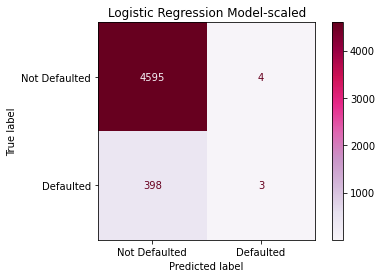

Test set accuracy:
0.9356
Validation set accuracy:
0.942


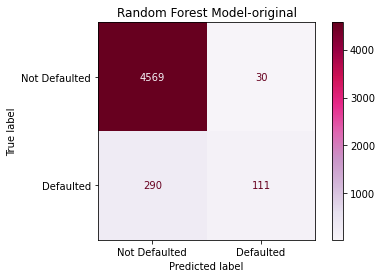

Test set accuracy:
0.936
Validation set accuracy:
0.9393333333333334


In [ ]:
#CONFUSION MATRICES
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def plot(classifier, x, y, title): 
    class_names = ["Not Defaulted", "Defaulted"]
    disp = plot_confusion_matrix(classifier, x, y,
                                 display_labels=class_names,
                                 cmap=plt.cm.PuRd, values_format = ''
                                   )
    disp.ax_.set_title(title)
    plt.show() 

plot(logReg, x_Test, y_Test, "Logistic Regression Model-scaled")
print("Test set accuracy:") #before smote- .9311, after smote- .87
print(accuracyLRTEST)
print("Validation set accuracy:") #before smote- .934, after smote- .8, 
print(accuracyLRVAL)
plot(rf, x_Test, y_Test, "Random Forest Model-original")
print("Test set accuracy:") #before smote- 1.0, after smote- 1.0
print(accuracyRFTEST)
print("Validation set accuracy:") #before smote- .942, after smote- .936
print(accuracyRFVAL)
plot(gb_clf,x_Test, y_Test, "Gradient Boosting")


In [ ]:
importanceGB = pd.DataFrame({'feature': list(x_Train.columns),
                   'importance': gb_clf2.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
print(importanceGB)

                               feature  importance
7      mortgages_past_due_6_months_num    0.501271
1                        avg_card_debt    0.222984
9                     inq_12_month_num    0.047197
13                      uti_50plus_pct    0.032180
14                 uti_max_credit_line    0.030122
6    non_mtg_acc_past_due_6_months_num    0.028498
15                 uti_card_50plus_pct    0.026413
5   non_mtg_acc_past_due_12_months_num    0.019423
4                             card_age    0.018980
12                            uti_card    0.018157
8               credit_past_due_amount    0.014310
2                           credit_age    0.014092
3                      credit_good_age    0.013788
0                      tot_credit_debt    0.010987
11              card_open_36_month_num    0.000647
16                          rep_income    0.000311
19                           States_GA    0.000213
21                           States_MS    0.000213
22                           St

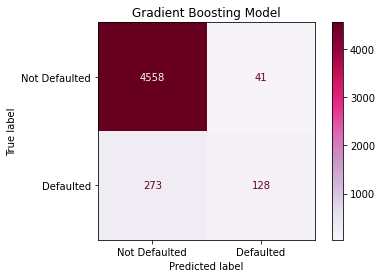

Test set accuracy:
0.9372
Validation set accuracy:
0.9363333333333334


In [ ]:
plot(gb_clf2, x_Test, y_Test, "Gradient Boosting Model")
print("Test set accuracy:") 
print(accuracyGBTEST)
print("Validation set accuracy:") 
print(accuracyGBVAL)